In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.metrics import r2_score
import math
import warnings
import csv
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import autograd
import torch.optim as optim
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Seismic/Copy of nga-east_rotd50_5pct_flatfile_public_20141118.xlsx"
df_org = pd.read_excel(path)

In [ ]:
CGAN_B_GENERATOR_PATH = "/content/drive/MyDrive/Seismic/Saved Models/CGAN_bg_model.df5"
CGAN_B_DISCRIMINATOR_PATH = "/content/drive/MyDrive/Seismic/Saved Models/CGAN_bd_model.hdf5"

CGAN_GENERATOR_PATH = "/content/drive/MyDrive/Seismic/Saved Models/CGAN_g_model.df5"
CGAN_DISCRIMINATOR_PATH = "/content/drive/MyDrive/Seismic/Saved Models/CGAN_d_model.hdf5"

res = "/content/drive/MyDrive/Seismic/results.csv"

In [ ]:
# Make device agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
df=df_org

df

,Record Sequence Number,EQID,Earthquake Name,Earthquake Location,Year,Month,Day,Hour,Minute,Earthquake Magnitude,...,T8.511363s,T8.709663s,T8.912497s,T9s,T9.120093s,T9.332537s,T9.5s,T9.549913s,T9.772401s,T10s
0,42,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,5.85,...,3.371480e-04,3.214520e-04,3.055400e-04,2.988270e-04,2.896760e-04,2.737270e-04,2.631590e-04,2.601610e-04,2.482690e-04,2.365760e-04
1,43,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,5.85,...,7.981870e-05,7.618600e-05,7.271660e-05,7.126930e-05,6.938110e-05,6.621790e-05,6.387290e-05,6.319790e-05,6.031420e-05,5.756260e-05
2,49,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,5.85,...,1.613400e-04,1.537930e-04,1.466720e-04,1.437700e-04,1.399400e-04,1.335270e-04,1.288400e-04,1.274950e-04,1.217690e-04,1.163280e-04
3,51,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,5.85,...,1.462360e-04,1.395990e-04,1.332670e-04,1.306680e-04,1.272240e-04,1.214550e-04,1.171800e-04,1.159490e-04,1.106930e-04,1.056780e-04
4,52,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,5.85,...,1.113560e-04,1.049390e-04,9.863450e-05,9.589730e-05,9.246470e-05,8.669810e-05,8.277760e-05,8.168850e-05,7.717850e-05,7.334710e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9377,12062,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,3.53,...,8.933050e-08,8.531680e-08,8.146960e-08,7.988330e-08,7.777390e-08,7.422510e-08,7.158480e-08,7.082370e-08,6.757090e-08,6.447040e-08
9378,12063,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,3.53,...,1.458760e-07,1.392980e-07,1.330240e-07,1.304630e-07,1.270800e-07,1.214380e-07,1.172640e-07,1.160620e-07,1.109160e-07,1.059250e-07
9379,12064,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,3.53,...,9.040710e-08,8.641220e-08,8.256080e-08,8.097280e-08,7.885820e-08,7.529330e-08,7.263440e-08,7.186690e-08,6.858680e-08,6.544350e-08
9380,12065,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,3.53,...,1.289430e-07,1.231820e-07,1.176900e-07,1.154530e-07,1.125070e-07,1.075390e-07,1.038150e-07,1.027360e-07,9.808450e-08,9.359120e-08


In [ ]:
#Dropping rows with blank data (Point 1)

df.drop(df[df['Joyner-Boore Dist. (km)'] == -999].index, inplace = True)
df.drop(df[df['Depth Used (km)'] == -999].index, inplace = True)
# df.drop(df[df['Hypocenter Depth (km)'] == -999].index, inplace = True)
df.drop(df[df['Preferred VS30 (m/sec)'] == -999].index, inplace = True)

# Dropping rows with RJB > 1500km (Point 3)

df.drop(df[df['Joyner-Boore Dist. (km)'] > 1500].index, inplace = True)

# Removing questionable Hypocentral Distance (Point 5)

df.drop(df[df['HypD (km)'] <= 0].index, inplace = True)

In [ ]:
df.reset_index()

res = ['_PGA', '_PGV', 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 2.5, 3, 4]
PSA_tp = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 2.5, 3, 4]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler_cond = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
X_real = pd.DataFrame()

X_real['Mw'] = df['Earthquake Magnitude']
# X['Rjb'] = df['Joyner-Boore Dist. (km)']
X_real['logRjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
# X['Mw/Rjb'] = df_lr['Mw']/df_lr['Rjb']
# X['focal'] = df['ClstD (km)']
X_real['Vs30'] = df['Preferred VS30 (m/sec)']

X_real['PSA_PGA'] = np.log10(df['PGA-H RotDnn (g)'])
X_real['PSA_PGV'] = np.log10(df['PGV-H RotDnn (cm/s)'])

for i in PSA_tp:
    X_real[f'PSA{i}'] = np.log10(df[f'T{i}s'])

X_real

,Mw,logRjb,Vs30,PSA_PGA,PSA_PGV,PSA0.01,PSA0.02,PSA0.03,PSA0.04,PSA0.05,...,PSA0.6,PSA0.7,PSA0.8,PSA0.9,PSA1,PSA1.5,PSA2,PSA2.5,PSA3,PSA4
0,5.85,1.937418,160.0,-0.846673,0.733903,-0.846301,-0.817585,-0.790775,-0.836129,-0.790901,...,-1.010483,-1.108882,-1.171670,-1.289565,-1.388371,-1.662207,-1.719499,-2.181206,-2.394863,-2.752702
1,5.85,1.622214,2000.0,-0.878309,0.357992,-0.887975,-0.717011,-0.577174,-0.546853,-0.523905,...,-1.441903,-1.454462,-1.720429,-1.977506,-2.134566,-2.452608,-2.768788,-2.998500,-3.172543,-3.434573
2,5.85,1.948609,2000.0,-1.043500,0.550069,-1.043710,-0.952460,-0.953513,-0.893714,-0.771661,...,-1.194122,-1.271904,-1.374464,-1.507287,-1.626812,-1.973814,-2.335157,-2.557226,-2.771826,-3.091747
3,5.85,1.935507,2000.0,-0.970860,0.536457,-0.974100,-0.822409,-0.683438,-0.627171,-0.694745,...,-1.326528,-1.461821,-1.597634,-1.674250,-1.748883,-2.222098,-2.448061,-2.698172,-2.884729,-3.159292
4,5.85,2.159146,2000.0,-1.302771,0.287802,-1.303143,-1.288194,-1.293112,-1.229611,-1.132284,...,-1.696163,-1.777281,-1.684361,-1.687531,-1.760853,-2.254057,-2.574251,-2.758105,-2.903705,-3.232300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9377,3.53,2.085291,2000.0,-3.713184,-2.354371,-3.689305,-3.730580,-3.671563,-3.634894,-3.502940,...,-4.542681,-4.737241,-4.843957,-4.931369,-5.099638,-5.434628,-5.718333,-5.943126,-6.101343,-6.389229
9378,3.53,2.111195,2000.0,-3.365200,-2.073133,-3.353941,-3.351993,-3.289998,-3.276542,-3.254820,...,-4.323550,-4.479245,-4.612852,-4.797768,-4.921870,-5.191453,-5.550477,-5.788989,-5.957468,-6.175687
9379,3.53,2.002555,2000.0,-3.537452,-2.269654,-3.526431,-3.581073,-3.525707,-3.398191,-3.227623,...,-4.567608,-4.681263,-4.896289,-4.970974,-5.034458,-5.457661,-5.733077,-5.939378,-6.147577,-6.384308
9380,3.53,2.011655,2000.0,-3.268943,-2.120268,-3.251451,-3.284981,-3.212849,-3.169882,-3.022307,...,-4.319870,-4.448809,-4.640282,-4.750181,-4.878053,-5.347538,-5.625800,-5.795766,-5.976505,-6.234569


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test_temp = train_test_split(X_real, test_size=0.3)
X_val, X_test = train_test_split(X_test_temp, test_size=0.5)

In [ ]:
X_cond_temp = pd.DataFrame(scaler_cond.fit_transform(X_real[['Mw',	'logRjb',	'Vs30']]))

In [ ]:
X_train = pd.DataFrame(scaler.fit_transform(X_real))
X_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.000000,0.218991,-0.982759,0.864521,0.839195,0.864823,0.794086,0.795292,0.691297,0.793738,...,0.878360,0.884130,0.882807,0.885235,0.870026,0.841859,0.848663,0.748909,0.739103,0.656441
1,1.000000,0.020227,1.000000,0.854654,0.715866,0.851823,0.824139,0.858801,0.772952,0.873116,...,0.748005,0.780132,0.719308,0.679710,0.648703,0.614070,0.554090,0.522649,0.523158,0.472945
2,1.000000,0.226048,1.000000,0.803129,0.778883,0.803243,0.753783,0.746906,0.675043,0.799458,...,0.822873,0.835071,0.822386,0.820190,0.799304,0.752056,0.675826,0.644812,0.634428,0.565202
3,1.000000,0.217786,1.000000,0.825786,0.774417,0.824957,0.792645,0.827206,0.750280,0.822325,...,0.782866,0.777918,0.755894,0.770309,0.763097,0.680502,0.644129,0.605792,0.603078,0.547025
4,1.000000,0.358810,1.000000,0.722259,0.692838,0.722316,0.653461,0.645935,0.580228,0.692246,...,0.671180,0.682984,0.730054,0.766341,0.759547,0.671291,0.608703,0.589200,0.597808,0.527378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,-0.264305,0.312238,1.000000,-0.029576,-0.174008,-0.022021,-0.076358,-0.061234,-0.098717,-0.012544,...,-0.188901,-0.207779,-0.211326,-0.202770,-0.230740,-0.245332,-0.273954,-0.292541,-0.290110,-0.322173
8079,-0.264305,0.328573,1.000000,0.078964,-0.081739,0.082591,0.036769,0.052214,0.002436,0.061221,...,-0.122690,-0.130139,-0.142470,-0.162856,-0.178014,-0.175251,-0.226831,-0.249869,-0.250159,-0.264708
8080,-0.264305,0.260066,1.000000,0.025237,-0.146214,0.028785,-0.031683,-0.017868,-0.031902,0.069307,...,-0.196433,-0.190933,-0.226918,-0.214602,-0.211407,-0.251970,-0.278093,-0.291503,-0.302948,-0.320849
8081,-0.264305,0.265804,1.000000,0.108988,-0.097203,0.114562,0.056793,0.075152,0.032543,0.130347,...,-0.121579,-0.120979,-0.150643,-0.148639,-0.165018,-0.220233,-0.247977,-0.251746,-0.255445,-0.280553


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(31, 50),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(50, 80),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(80, 100),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(100, 1),
            nn.Sigmoid()
        )

    def forward(self, x, c, batch_size):
      # x = torch.from_numpy(x)
      # c = torch.from_numpy(c)

      c = c.view(batch_size, -1)
      x = x.view(x.size(0), 28)
      x = torch.cat((x, c), 1)

      out = self.model(x.to(torch.float32))

      return out.squeeze()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(13, 128),
            nn.LeakyReLU(0.2, inplace=True),
            # nn.ReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2, inplace=True),
            # nn.ReLU(),
            nn.Linear(64, 45),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(45, 28),
            nn.Tanh()
        )

    def forward(self, z, c, batch_size):
      # z = torch.from_numpy(z)
      # c = torch.from_numpy(c)
      # c = np.array(c)
      # c = c.view(batch_size, -1)
      c = c.reshape(batch_size, -1)
      z = z.view(batch_size, 10)
      x = torch.cat((z, c), 1)

      out = self.model(x.to(torch.float32))

      return out.view(x.size(0), 28)

In [ ]:
def generate_real_samples(df_real, n):

  df_sample = df_real.sample(n)

  X1 = torch.from_numpy(df_sample[[0, 1, 2]].values)
  X2 = torch.from_numpy(df_sample[[i for i in range(3,31)]].values)
  # X1 = torch.from_numpy(df_sample[['Mw', 'logRjb', 'Vs30']].values)
  # X2 = torch.from_numpy(df_sample[[f'PSA{i}' for i in res]].values)

  # X = torch.hstack((X1, X2))
  # y = torch.ones((n, 1))

  X1 = X1.to(device)
  X2 = X2.to(device)

  return X2, X1


def generate_latent_points(latent_dim, n_conditions, batch_size, data):

  z_vector = np.random.randn(latent_dim * batch_size)
  z_vector = torch.from_numpy(z_vector)
  # cond = data.sample(batch_size)[[0, 1, 2]].values
  # cond = data.sample(batch_size)[['Mw', 'logRjb', 'Vs30']].values

  z_vector = z_vector.reshape(batch_size, latent_dim)

  z_vector = z_vector.to(device)

  return z_vector


def generate_fake_samples(generator, latent_dim, n_conditions, batch_size, data):

  z_vector = generate_latent_points(latent_dim, n_conditions, batch_size, data)
  cond = np.random.randn(n_conditions * batch_size)

  cond = torch.from_numpy(cond)

  z_vector = z_vector.to(device)
  cond = cond.to(device)

  X = generator(z_vector, cond, batch_size)
  # X = torch.cat((z_vector, cond), 1)
  # y = torch.zeros((batch_size, 1))

  # X = X.to(device)
  # y = y.to(device)

  return X, cond

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [ ]:
# Define your loss function (e.g., binary cross-entropy)
criterion = nn.BCELoss().to(device)
# criterion = nn.MSELoss().to(device)

torch.set_grad_enabled(True)

# Define your optimizer (e.g., Adam optimizer)
gen_optimizer = optim.Adam(generator.parameters(), lr=0.0005, betas=(0.5, 0.999))
dis_optimizer = optim.Adam(discriminator.parameters(), lr=0.0005, betas=(0.5, 0.999))

In [ ]:
generator.load_state_dict(torch.load(CGAN_B_GENERATOR_PATH))
discriminator.load_state_dict(torch.load(CGAN_B_DISCRIMINATOR_PATH))

<All keys matched successfully>

In [ ]:
i=0

with open(res, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
    i+=1
    if i==10000:
      latest = lines

float(str(latest[1]))

0.793125079182139

In [ ]:
from tqdm.auto import tqdm

def predict(conditions_test, generator, device):
    generator.eval()  # Set the model to evaluation mode
    with torch.no_grad():
      # Generate noise vector

      input = np.random.randn(10 * conditions_test.shape[0])
      input = torch.from_numpy(input)
      input = input.to(device)

      conditions_test = torch.from_numpy(conditions_test)
      conditions_test = conditions_test.to(device)

      # Generate outputs
      predicted_outputs = generator(input, conditions_test, conditions_test.shape[0])
      predicted_outputs = torch.cat((conditions_test, predicted_outputs), 1)

    return predicted_outputs

In [ ]:
def train(g_model, d_model, data, val_data, latent_dim, n_epochs = 30000, n_batch = 128, best_r2=-100000):
  batch_per_epoch = int(data.shape[0] / n_batch)
  half_batch = int(n_batch/2)

  y_real = torch.ones((64, 1))
  y_fake = torch.zeros((64, 1))

  y_real = y_real.to(device)
  y_fake = y_fake.to(device)

  for i in range(n_epochs):
    for j in range(batch_per_epoch):

      data_real, cond_real = generate_real_samples(data, half_batch)
      data_fake, cond_fake = generate_fake_samples(generator, latent_dim, 3, half_batch, data)

      data_real = data_real.to(device)
      # y_real = y_real.to(device)

      data_fake = data_fake.to(device)
      # y_fake = y_fake.to(device)

      d_model.zero_grad()

      # Fake
      fake_output = discriminator(data_fake, cond_fake, half_batch)
      # print(fake_output, y_fake)
      fake_output = fake_output.to(device)
      d_total_loss = 0

      d_loss = criterion(fake_output, y_fake.squeeze())
      d_total_loss+=d_loss
      d_loss.backward(retain_graph=True)
      dis_optimizer.step()

      # Real
      real_output = discriminator(data_real, cond_real, half_batch)
      real_output = real_output.to(device)
      d_loss = criterion(real_output, y_real.squeeze())
      d_total_loss+=d_loss

      d_loss.backward(retain_graph=True)
      dis_optimizer.step()

      # d_loss = d_loss_real + d_loss_fake

      # d_loss.backward(retain_graph=True)
      # dis_optimizer.step()


      # Training the generator
      generator.zero_grad()

      fake_output = discriminator(data_fake, cond_fake, half_batch)
      # print(fake_output, y_real)
      g_loss = criterion(fake_output, y_real.squeeze())

      g_loss.backward()
      gen_optimizer.step()

      # Print training stats
      if j % 100 == 0 and i%100 == 0:
        print('[%d/%d][%d/%d] Loss_D: %.10f || Loss_G: %.10f' % (i, n_epochs, j, batch_per_epoch, d_total_loss.item(), g_loss.item()))


    X_val_temp = pd.DataFrame(scaler.transform(val_data))

    conditions_val = X_val_temp[[0, 1, 2]]
    conditions_val = conditions_val.to_numpy()

    pred_outputs = predict(conditions_val, generator, device)

    true_values = scaler.inverse_transform(X_val_temp)
    pred_outputs = scaler.inverse_transform(pred_outputs)

    curr_r_squared_test = r2_score(true_values, pred_outputs)

    torch.save(generator.state_dict(), CGAN_GENERATOR_PATH)
    torch.save(discriminator.state_dict(), CGAN_DISCRIMINATOR_PATH)

    if(curr_r_squared_test > best_r2):
      torch.save(generator.state_dict(), CGAN_B_GENERATOR_PATH)
      torch.save(discriminator.state_dict(), CGAN_B_DISCRIMINATOR_PATH)
      best_r2 = curr_r_squared_test

    res_ls = [i, best_r2, curr_r_squared_test, d_total_loss.item(), g_loss.item()]

    with open(res,'a') as fd:
      writer = csv.writer(fd)
      writer.writerow(res_ls)
      # fd.write(str(curr_r_squared_test))

    if i%100 == 0:
      print(f'Validation r2 Score: {curr_r_squared_test} || Best r2 Score: {best_r2}')


# TRAIN CODE (DO NOT RUN)

In [ ]:
# train(generator, discriminator, data = X_train, val_data = X_val, latent_dim = 10, n_epochs = 50000, best_r2 = float(latest[1]))

[0/50000][0/63] Loss_D: 0.4161548913 || Loss_G: 23.3297634125
Validation r2 Score: 0.6979785475184399 || Best r2 Score: 0.793125079182139
[100/50000][0/63] Loss_D: 0.4109743834 || Loss_G: 20.0251026154
Validation r2 Score: 0.6858631054442855 || Best r2 Score: 0.793125079182139
[200/50000][0/63] Loss_D: 0.2668690383 || Loss_G: 22.3899230957
Validation r2 Score: 0.7067043013960281 || Best r2 Score: 0.793125079182139
[300/50000][0/63] Loss_D: 0.3556945622 || Loss_G: 17.1806221008
Validation r2 Score: 0.7360665646567693 || Best r2 Score: 0.793125079182139
[400/50000][0/63] Loss_D: 0.3987886310 || Loss_G: 30.3518466949
Validation r2 Score: 0.6280236692252738 || Best r2 Score: 0.793125079182139
[500/50000][0/63] Loss_D: 0.2982707918 || Loss_G: 17.2334270477
Validation r2 Score: 0.7169507761384067 || Best r2 Score: 0.793125079182139
[600/50000][0/63] Loss_D: 0.4187278748 || Loss_G: 28.5509395599
Validation r2 Score: 0.7403043802551337 || Best r2 Score: 0.793125079182139
[700/50000][0/63] Loss

In [ ]:
X_test

,Mw,logRjb,Vs30,PSA_PGA,PSA_PGV,PSA0.01,PSA0.02,PSA0.03,PSA0.04,PSA0.05,...,PSA0.6,PSA0.7,PSA0.8,PSA0.9,PSA1,PSA1.5,PSA2,PSA2.5,PSA3,PSA4
1475,3.72,2.803402,2000.0,-5.148295,-3.404085,-5.149008,-5.148747,-4.965412,-4.870407,-4.835106,...,-4.943785,-5.202091,-5.234422,-5.342080,-5.406041,-5.685055,-5.808529,-6.120502,-6.377818,-6.706845
9290,4.71,3.112963,429.2,-5.382884,-2.970454,-5.382900,-5.382425,-5.384752,-5.383652,-5.382946,...,-5.156098,-5.117130,-5.085870,-4.971770,-4.833043,-4.908797,-5.077902,-5.203560,-5.187529,-5.498631
6534,3.89,2.331872,629.6,-3.335020,-2.174042,-3.338310,-3.411845,-3.264418,-3.351738,-3.343452,...,-3.779270,-4.133714,-4.187132,-4.262701,-4.385242,-4.872808,-5.274001,-5.389099,-5.668945,-5.936434
8737,5.68,3.025846,503.5,-3.431435,-1.287140,-3.431519,-3.429185,-3.440508,-3.433845,-3.431726,...,-2.970746,-3.023855,-3.213415,-3.355289,-3.331473,-3.562067,-3.959473,-3.993953,-4.001531,-3.868266
1130,4.65,2.950267,500.0,-3.479975,-1.634531,-3.480484,-3.479924,-3.477514,-3.474731,-3.473143,...,-3.293310,-3.422727,-3.287745,-3.434871,-3.577497,-3.861372,-4.334311,-4.619275,-4.878916,-5.145173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,4.68,2.384783,160.0,-2.823417,-0.954873,-2.824337,-2.823770,-2.810600,-2.796190,-2.741205,...,-2.578727,-2.600037,-2.482224,-2.677450,-2.758030,-3.084938,-3.718442,-3.860404,-3.917976,-4.055880
1976,4.03,2.959533,269.0,-4.597876,-2.634100,-4.597912,-4.594019,-4.606405,-4.600853,-4.598134,...,-4.131095,-4.477206,-4.508095,-4.448493,-4.470031,-4.592691,-5.214573,-5.416877,-5.668737,-5.927269
768,3.82,2.705667,2000.0,-4.336497,-2.731001,-4.337545,-4.335897,-4.319616,-4.316323,-4.270905,...,-4.524698,-4.725057,-4.809296,-4.903323,-5.076146,-5.435858,-5.821760,-5.986009,-6.246081,-6.487022
1800,5.30,2.961563,269.0,-3.381481,-1.243958,-3.381566,-3.380338,-3.385470,-3.381985,-3.381740,...,-2.783327,-3.047072,-3.128805,-3.038645,-3.001551,-3.034284,-3.565487,-3.748033,-4.021134,-4.261817


In [ ]:
X_test_temp = pd.DataFrame(scaler.transform(X_test))
true_values = scaler.inverse_transform(X_test_temp)

conditions_test = X_test_temp[[0, 1, 2]]
conditions_test = conditions_test.to_numpy()

X_test_temp

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.160763,0.765072,1.000000,-0.477204,-0.518399,-0.477360,-0.500126,-0.445926,-0.447468,-0.408594,...,-0.310096,-0.347670,-0.327663,-0.325471,-0.321619,-0.317504,-0.299276,-0.341645,-0.366882,-0.407646
1,0.378747,0.960278,-0.692672,-0.550375,-0.376133,-0.550320,-0.569953,-0.570606,-0.592343,-0.571465,...,-0.374246,-0.322102,-0.283403,-0.214840,-0.151668,-0.093791,-0.094162,-0.087799,-0.036363,-0.082507
2,-0.068120,0.467730,-0.476724,0.088378,-0.114845,0.087467,0.018884,0.059819,-0.018790,0.034871,...,0.041765,-0.026155,-0.015630,-0.003002,-0.018849,-0.083419,-0.149214,-0.139164,-0.170042,-0.200323
3,0.907357,0.905343,-0.612608,0.058305,0.176130,0.058392,0.013703,0.007464,-0.041966,0.008628,...,0.286062,0.307843,0.274483,0.268091,0.293699,0.294330,0.219821,0.247068,0.292965,0.356235
4,0.346049,0.857684,-0.616379,0.043164,0.062158,0.043118,-0.001459,-0.003539,-0.053507,-0.003685,...,0.188599,0.187808,0.252336,0.244316,0.220729,0.208072,0.114591,0.073954,0.049333,0.012611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.362398,0.501095,-0.982759,0.247952,0.285141,0.247796,0.194610,0.194750,0.138026,0.213918,...,0.404512,0.435386,0.492336,0.470599,0.463783,0.431836,0.287488,0.284040,0.316166,0.305747
1209,0.008174,0.863526,-0.865302,-0.305522,-0.265782,-0.305452,-0.334366,-0.339185,-0.371380,-0.338143,...,-0.064540,-0.129525,-0.111259,-0.058508,-0.043998,-0.002690,-0.132530,-0.146854,-0.169984,-0.197856
1210,-0.106267,0.703441,1.000000,-0.223994,-0.297573,-0.224233,-0.257235,-0.253916,-0.291065,-0.240858,...,-0.183468,-0.204113,-0.200999,-0.194391,-0.223772,-0.245687,-0.302990,-0.304412,-0.330301,-0.348490
1211,0.700272,0.864807,-0.865302,0.073886,0.190297,0.073974,0.028299,0.023828,-0.027328,0.023489,...,0.342691,0.300856,0.299692,0.362690,0.391555,0.446434,0.330427,0.315149,0.287521,0.250328


In [ ]:
generator.load_state_dict(torch.load(CGAN_GENERATOR_PATH))
discriminator.load_state_dict(torch.load(CGAN_DISCRIMINATOR_PATH))

<All keys matched successfully>

In [ ]:
mean_output = []

for i in range(1000):
  output = predict(conditions_test, generator, device)
  output = scaler.inverse_transform(output)

  mean_output.append(output)

mean_array = np.mean(mean_output, axis=0)
mean_array

array([[ 3.72000000e+00,  2.80340248e+00,  2.00000000e+03, ...,
        -6.31946042e+00, -6.40733290e+00, -6.73657542e+00],
       [ 4.71000000e+00,  3.11296341e+00,  4.29200000e+02, ...,
        -4.87896983e+00, -4.95724985e+00, -5.35265532e+00],
       [ 3.89000000e+00,  2.33187250e+00,  6.29600000e+02, ...,
        -5.20541069e+00, -5.35448345e+00, -5.70289520e+00],
       ...,
       [ 3.82000000e+00,  2.70566704e+00,  2.00000000e+03, ...,
        -6.03595342e+00, -6.10452378e+00, -6.44871406e+00],
       [ 5.30000000e+00,  2.96156346e+00,  2.69000000e+02, ...,
        -3.78709630e+00, -3.85185111e+00, -4.05355597e+00],
       [ 4.29000000e+00,  1.72007657e+00,  2.00000000e+03, ...,
        -3.81437180e+00, -4.06561595e+00, -4.75572896e+00]])

In [ ]:
# Calculate R-squared for test data
r_squared_test = r2_score(true_values, mean_array)
r_squared_test

0.7474030678598899

In [ ]:
true_values = true_values[:,5:]
mean_array = mean_array[:,5:]

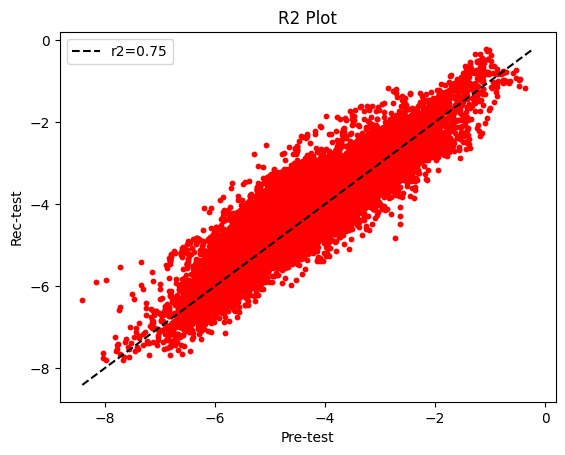

In [ ]:
plt.xlabel(r'$y-rec$')
plt.ylabel(r'$y-pred$')

#plt.scatter(X_test.data.numpy(), y_test.data.numpy(), color='k', s=2)
#serial =  range(0,37)
# serial = 20
# XX = y_test_tensor[:, serial].data.numpy()
XX = true_values
YY = mean_array
# YY = mean_prediction[:, ser

plt.scatter(XX, YY, color='r', s=10)

#plt.scatter( y_test,y_predict.data.numpy(), color='r', s=10)

min_val = min(np.min(XX), np.min(YY))
max_val = max(np.max(XX), np.max(YY))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='r2=0.75')

plt.title('R2 Plot')
plt.ylabel('Rec-test')
plt.xlabel('Pre-test')
plt.legend()

plt.show()

In [ ]:
X_train_temp = pd.DataFrame(X_train)
true_values = scaler.inverse_transform(X_train_temp)

conditions_train = X_train_temp[[0, 1, 2]]
conditions_train = conditions_train.to_numpy()

X_train_temp

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.000000,0.218991,-0.982759,0.864521,0.839195,0.864823,0.794086,0.795292,0.691297,0.793738,...,0.878360,0.884130,0.882807,0.885235,0.870026,0.841859,0.848663,0.748909,0.739103,0.656441
1,1.000000,0.020227,1.000000,0.854654,0.715866,0.851823,0.824139,0.858801,0.772952,0.873116,...,0.748005,0.780132,0.719308,0.679710,0.648703,0.614070,0.554090,0.522649,0.523158,0.472945
2,1.000000,0.226048,1.000000,0.803129,0.778883,0.803243,0.753783,0.746906,0.675043,0.799458,...,0.822873,0.835071,0.822386,0.820190,0.799304,0.752056,0.675826,0.644812,0.634428,0.565202
3,1.000000,0.217786,1.000000,0.825786,0.774417,0.824957,0.792645,0.827206,0.750280,0.822325,...,0.782866,0.777918,0.755894,0.770309,0.763097,0.680502,0.644129,0.605792,0.603078,0.547025
4,1.000000,0.358810,1.000000,0.722259,0.692838,0.722316,0.653461,0.645935,0.580228,0.692246,...,0.671180,0.682984,0.730054,0.766341,0.759547,0.671291,0.608703,0.589200,0.597808,0.527378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,-0.264305,0.312238,1.000000,-0.029576,-0.174008,-0.022021,-0.076358,-0.061234,-0.098717,-0.012544,...,-0.188901,-0.207779,-0.211326,-0.202770,-0.230740,-0.245332,-0.273954,-0.292541,-0.290110,-0.322173
8079,-0.264305,0.328573,1.000000,0.078964,-0.081739,0.082591,0.036769,0.052214,0.002436,0.061221,...,-0.122690,-0.130139,-0.142470,-0.162856,-0.178014,-0.175251,-0.226831,-0.249869,-0.250159,-0.264708
8080,-0.264305,0.260066,1.000000,0.025237,-0.146214,0.028785,-0.031683,-0.017868,-0.031902,0.069307,...,-0.196433,-0.190933,-0.226918,-0.214602,-0.211407,-0.251970,-0.278093,-0.291503,-0.302948,-0.320849
8081,-0.264305,0.265804,1.000000,0.108988,-0.097203,0.114562,0.056793,0.075152,0.032543,0.130347,...,-0.121579,-0.120979,-0.150643,-0.148639,-0.165018,-0.220233,-0.247977,-0.251746,-0.255445,-0.280553


In [ ]:
mean_output = []

for i in range(1000):
  output = predict(conditions_train, generator, device)
  output = scaler.inverse_transform(output)

  mean_output.append(output)

mean_array = np.mean(mean_output, axis=0)
mean_array

array([[ 5.85000000e+00,  1.93741758e+00,  1.60000000e+02, ...,
        -2.11855281e+00, -2.42094737e+00, -2.46461235e+00],
       [ 5.85000000e+00,  1.62221402e+00,  2.00000000e+03, ...,
        -2.92395047e+00, -3.02033714e+00, -3.16155798e+00],
       [ 5.85000000e+00,  1.94860855e+00,  2.00000000e+03, ...,
        -3.00486956e+00, -3.16496641e+00, -3.38002507e+00],
       ...,
       [ 3.53000000e+00,  2.00255481e+00,  2.00000000e+03, ...,
        -5.68036187e+00, -5.81702715e+00, -6.28103787e+00],
       [ 3.53000000e+00,  2.01165501e+00,  2.00000000e+03, ...,
        -5.70257530e+00, -5.83105811e+00, -6.28824472e+00],
       [ 3.53000000e+00,  2.04214218e+00,  2.00000000e+03, ...,
        -5.74780966e+00, -5.88020780e+00, -6.32514076e+00]])

In [ ]:
# Calculate R-squared for train data
r_squared_test = r2_score(true_values, mean_array)
r_squared_test

0.7601592823508533

In [ ]:
true_values = true_values[:,5:]
mean_array = mean_array[:,5:]

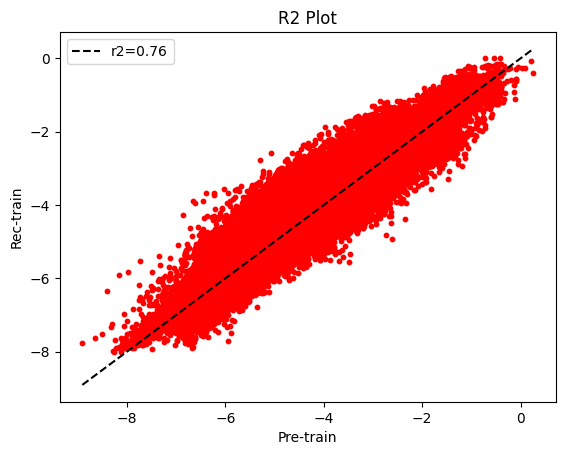

In [ ]:
plt.xlabel(r'$y-rec$')
plt.ylabel(r'$y-pred$')

#plt.scatter(X_train.data.numpy(), y_train.data.numpy(), color='k', s=2)
#serial =  range(0,37)
# serial = 20
# XX = y_train_tensor[:, serial].data.numpy()
XX = true_values
YY = mean_array
# YY = mean_prediction[:, ser

plt.scatter(XX, YY, color='r', s=10)

#plt.scatter( y_train,y_predict.data.numpy(), color='r', s=10)

min_val = min(np.min(XX), np.min(YY))
max_val = max(np.max(XX), np.max(YY))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='r2=0.76')

plt.title('R2 Plot')
plt.ylabel('Rec-train')
plt.xlabel('Pre-train')
plt.legend()

plt.show()

In [ ]:
import sklearn.model_selection as sk

In [ ]:
mask = df['USGS Potentially Induced Event (PIE) Flag'] == True
inter = df[mask]
intra = df[~mask]

In [ ]:
inter.reset_index(inplace = True)
intra.reset_index(inplace = True)

In [ ]:
inter['Mw/Rjb'] = np.array(inter['Earthquake Magnitude']) / np.array(inter['Joyner-Boore Dist. (km)'])
inter['log Rjb'] = np.log10(inter['Joyner-Boore Dist. (km)'])

yy = pd.DataFrame()
yy['log PGA'] = np.log10(inter['PGA-H RotDnn (g)'])
yy['log PGV'] = np.log10(inter['PGV-H RotDnn (cm/s)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    yy[f"log PSA {i}s"] = np.log10(inter[f"T{i}s"])

XX = inter[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
# XX = inter[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]

# x_train1, x_test1, y_train1, y_test1 = sk.train_test_split(XX, yy, test_size = 0.15, random_state = 42)
# x_test1, x_val1, y_test1, y_val1 = sk.train_test_split(x_test1, y_test1, test_size = 0.5, random_state = 42)

In [ ]:
conditions_inter = XX[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]
conditions_inter = conditions_inter.to_numpy()
conditions_inter_pred = scaler_cond.transform(conditions_inter)

In [ ]:
mean_output = []

for i in range(1000):
  output = predict(conditions_inter_pred, generator, device)
  output = scaler.inverse_transform(output)

  mean_output.append(output)

inter_y_pred = np.mean(mean_output, axis=0)

In [ ]:
residue_inter = yy - inter_y_pred[:,6:]

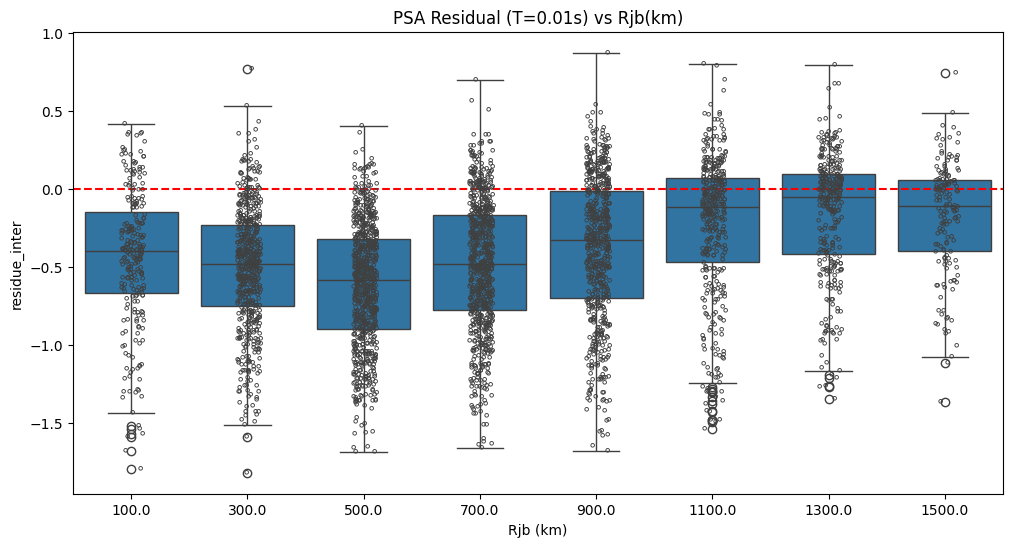

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Joyner-Boore Dist. (km)'].max() - XX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XX[(XX['Joyner-Boore Dist. (km)'] >= start_dist) & (XX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_inter[(XX['Joyner-Boore Dist. (km)'] >= start_dist) & (XX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Rjb(km)')
plt.show()

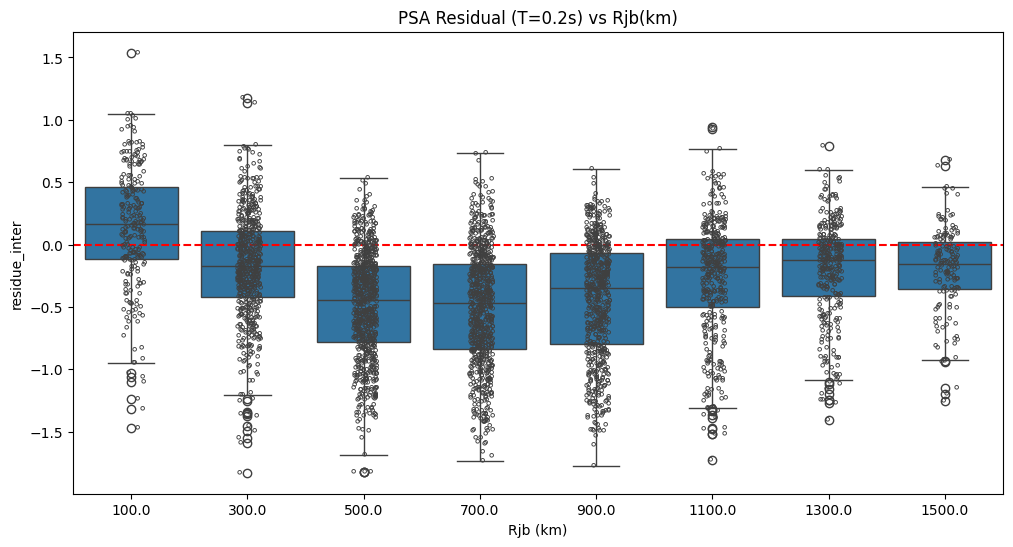

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Joyner-Boore Dist. (km)'].max() - XX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XX[(XX['Joyner-Boore Dist. (km)'] >= start_dist) & (XX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_inter[(XX['Joyner-Boore Dist. (km)'] >= start_dist) & (XX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.2s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.2s) vs Rjb(km)')
plt.show()

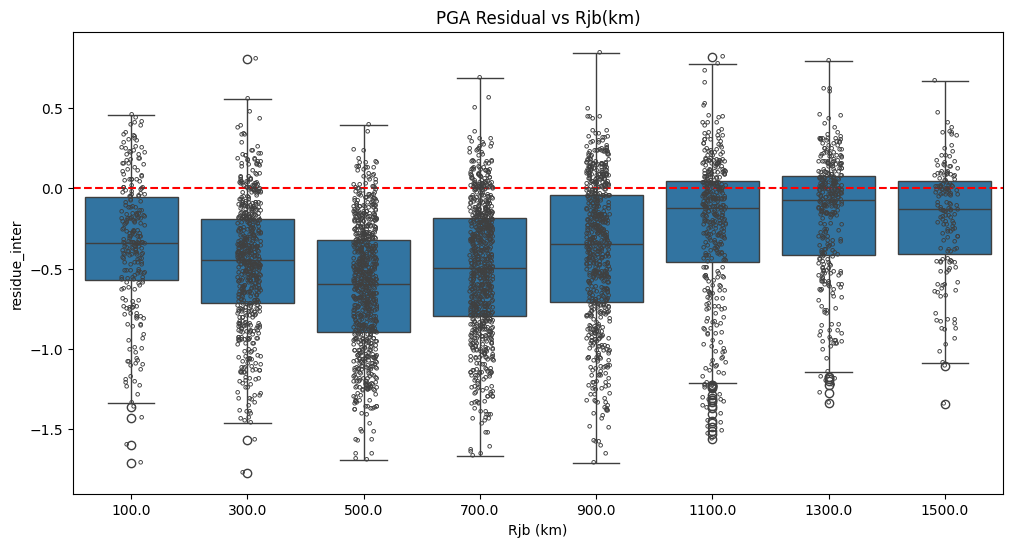

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Joyner-Boore Dist. (km)'].max() - XX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XX[(XX['Joyner-Boore Dist. (km)'] >= start_dist) & (XX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_inter[(XX['Joyner-Boore Dist. (km)'] >= start_dist) & (XX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PGA']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PGA Residual vs Rjb(km)')
plt.show()

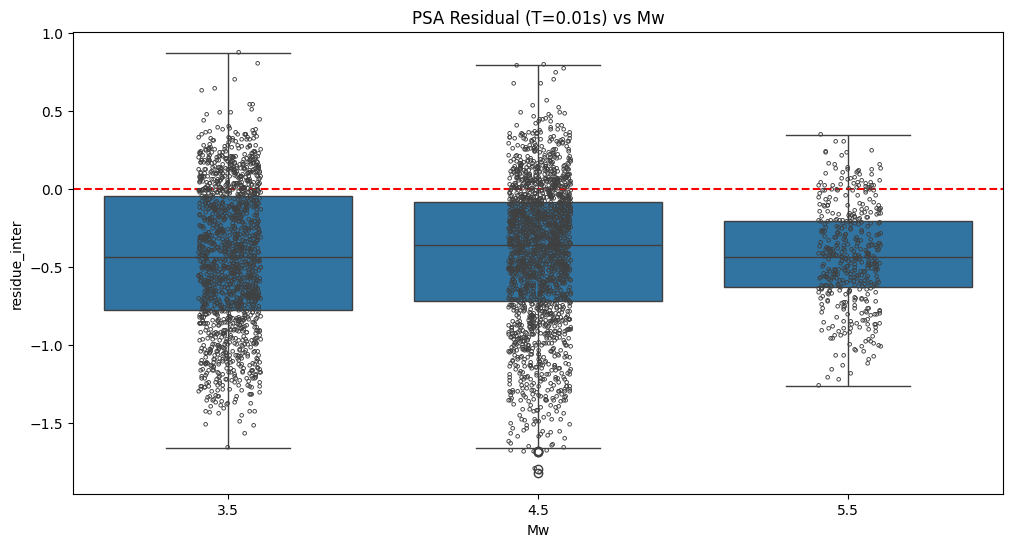

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Mw')
plt.show()

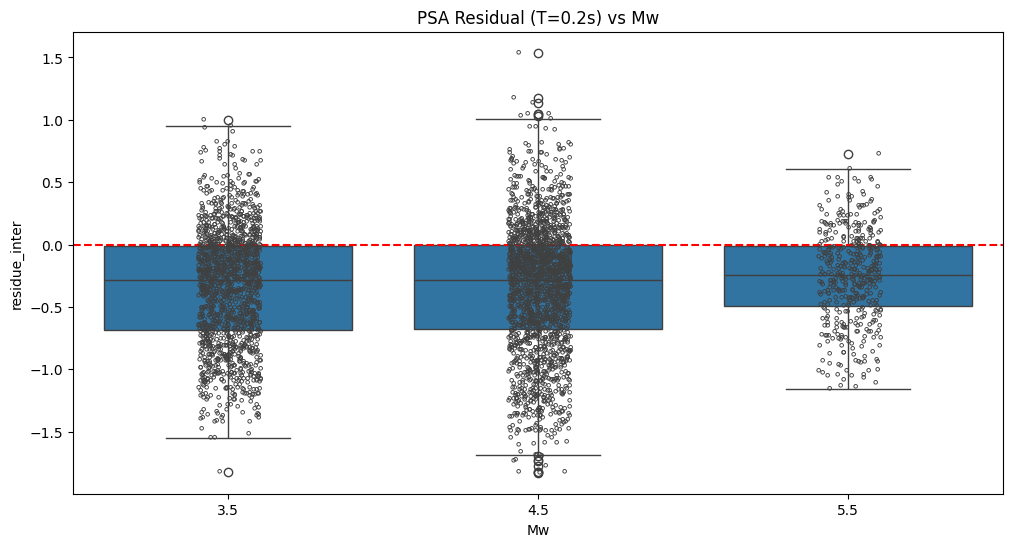

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.2s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.2s) vs Mw')
plt.show()

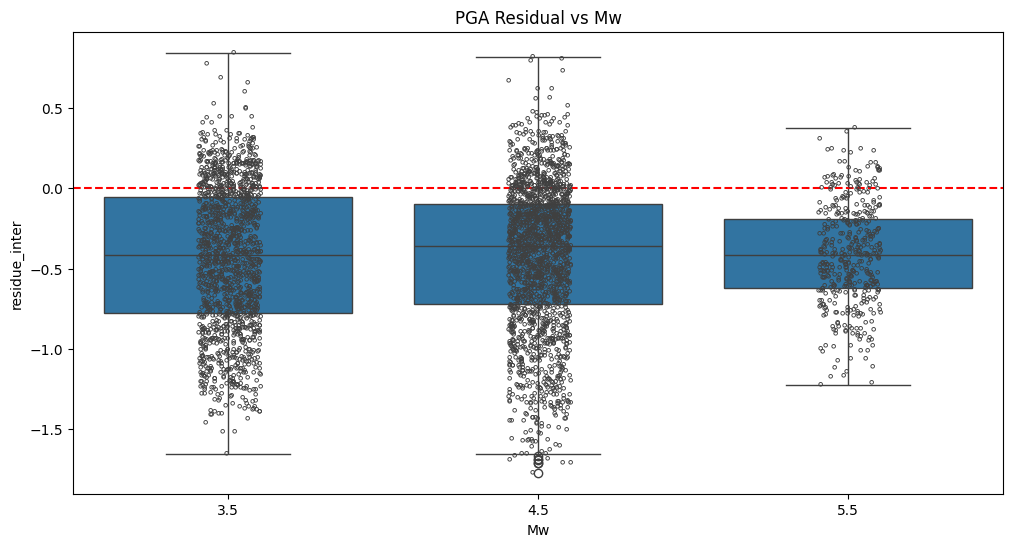

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PGA']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PGA Residual vs Mw')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Mw')
plt.show()

In [ ]:
# plt.scatter(conditions_inter[:,0],residue_inter['log PSA 0.01s'])
# plt.xlabel('Mw')
# plt.ylabel('Residue')
# plt.title('Earthquake Magnitude vs PSA 0.01s Residue')

In [ ]:
# plt.scatter(conditions_inter[:,0],residue_inter['log PSA 0.05s'])
# plt.xlabel('Mw')
# plt.ylabel('Residue')
# plt.title('Earthquake Magnitude vs PSA 0.05s Residue')

In [ ]:
intra['Mw/Rjb'] = np.array(intra['Earthquake Magnitude']) / np.array(intra['Joyner-Boore Dist. (km)'])
intra['log Rjb'] = np.log10(intra['Joyner-Boore Dist. (km)'])

yyy = pd.DataFrame()
yyy['log PGA'] = np.log10(intra['PGA-H RotDnn (g)'])
yyy['log PGV'] = np.log10(intra['PGV-H RotDnn (cm/s)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    yyy[f"log PSA {i}s"] = np.log10(intra[f"T{i}s"])

XXX = intra[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
# XXX = intra[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]

# x_train2, x_test2, y_train2, y_test2 = sk.train_test_split(XXX, yyy, test_size = 0.15, random_state = 42)
# x_test2, x_val2, y_test2, y_val2 = sk.train_test_split(x_test2, y_test2, test_size = 0.5, random_state = 42)


In [ ]:
conditions_intra = XXX[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]
conditions_intra = conditions_intra.to_numpy()
conditions_intra_pred = scaler_cond.transform(conditions_intra)

In [ ]:
mean_output = []

for i in range(1000):
  output = predict(conditions_intra_pred, generator, device)
  output = scaler.inverse_transform(output)

  mean_output.append(output)

intra_y_pred = np.mean(mean_output, axis=0)

In [ ]:
residue_intra = yyy - intra_y_pred[:,6:]

In [ ]:
# plt.scatter(conditions_intra[:,0],residue_intra['log PSA 0.01s'])
# plt.xlabel('Mw')
# plt.ylabel('Residue')
# plt.title('Earthquake Magnitude vs PSA 0.01s Residue')

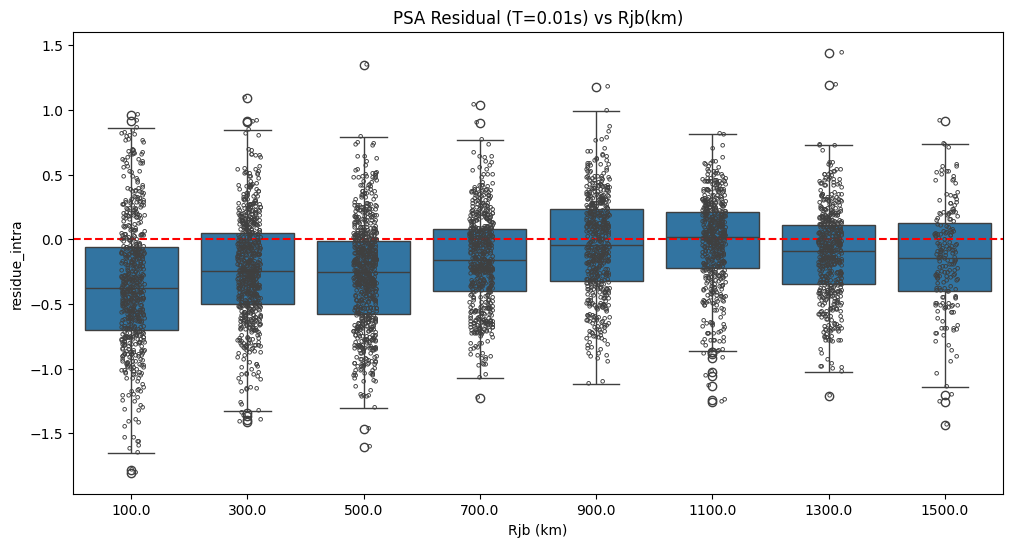

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Rjb(km)')
plt.show()


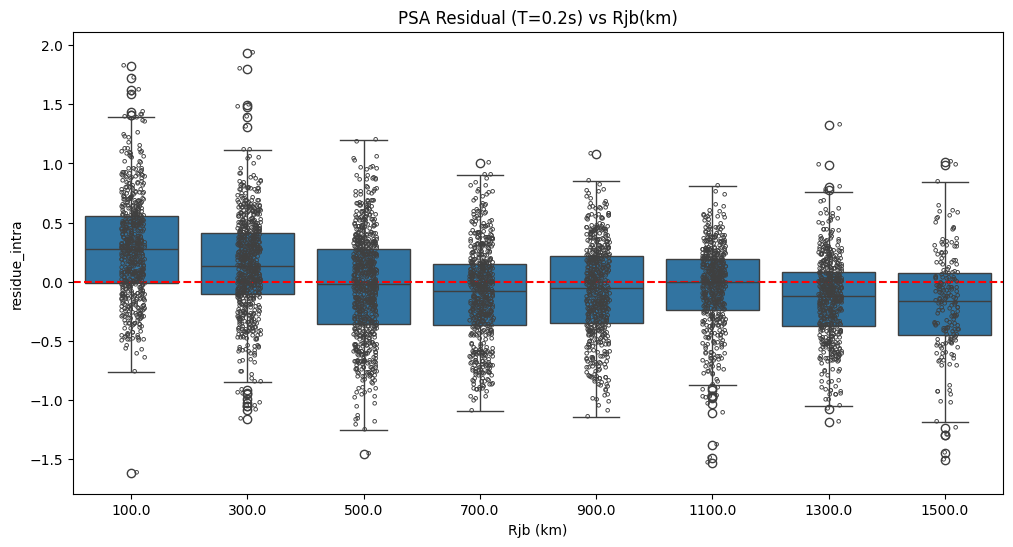

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.2s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.2s) vs Rjb(km)')
plt.show()

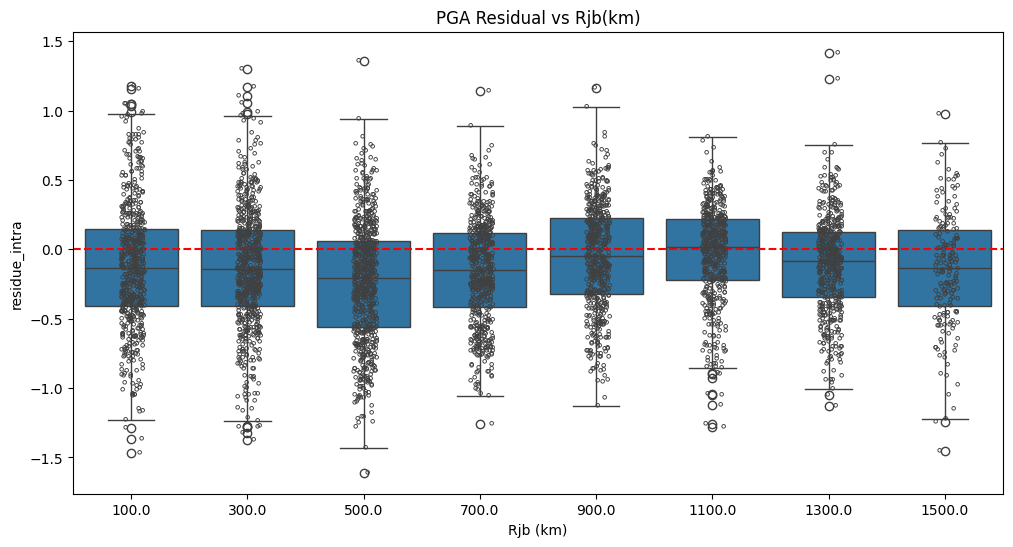

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PGA']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PGA Residual vs Rjb(km)')
plt.show()

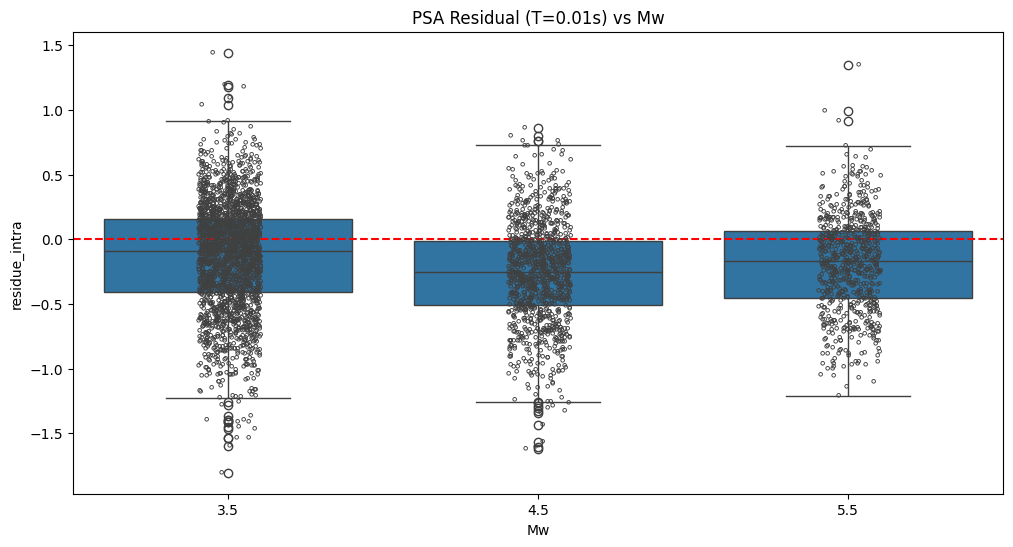

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Earthquake Magnitude'].max() - XXX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XXX[(XXX['Earthquake Magnitude'] >= start_dist) & (XXX['Earthquake Magnitude'] < end_dist)]

  intraval_data = residue_intra[(XXX['Earthquake Magnitude'] >= start_dist) & (XXX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = intraval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Mw')
plt.show()

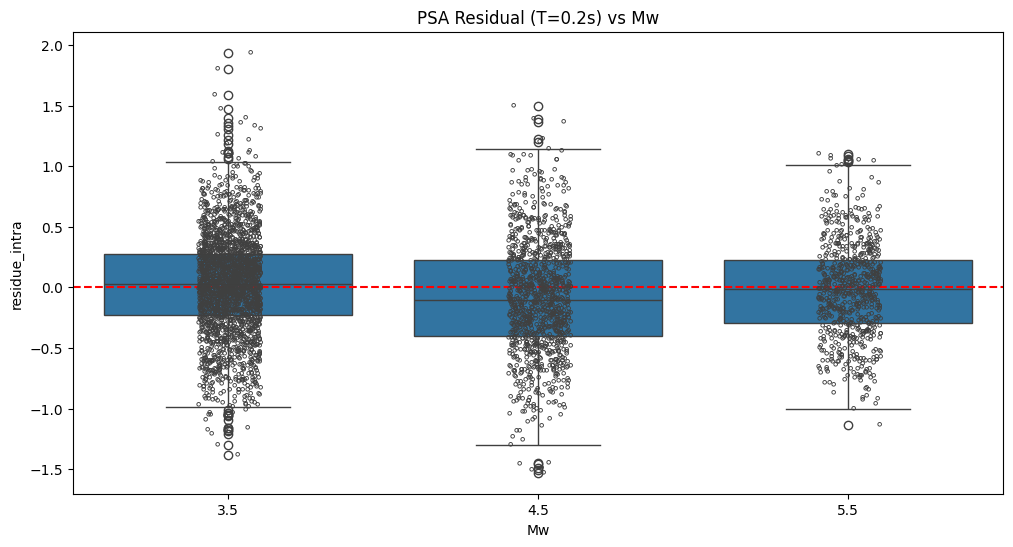

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Earthquake Magnitude'].max() - XXX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XXX[(XXX['Earthquake Magnitude'] >= start_dist) & (XXX['Earthquake Magnitude'] < end_dist)]

  intraval_data = residue_intra[(XXX['Earthquake Magnitude'] >= start_dist) & (XXX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = intraval_data['log PSA 0.2s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.2s) vs Mw')
plt.show()

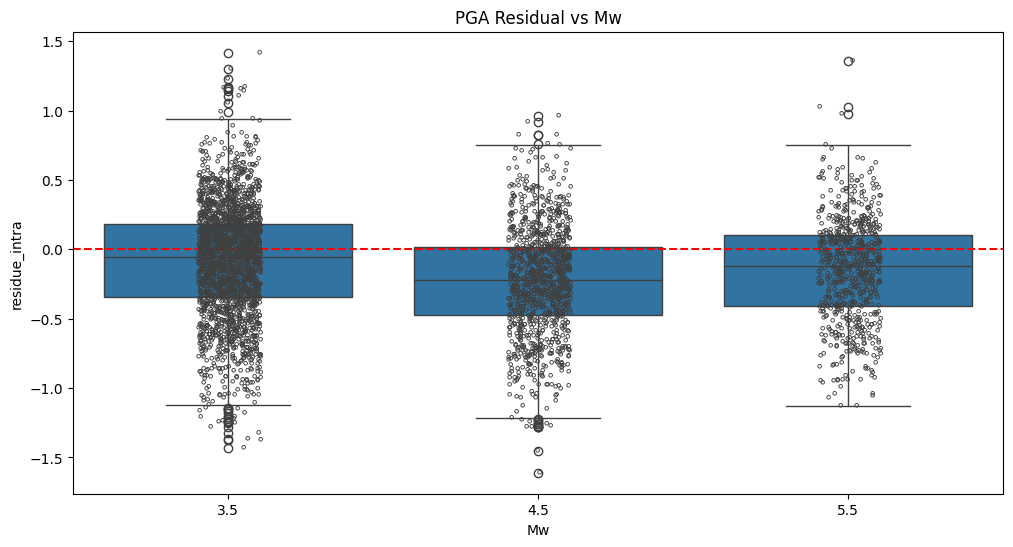

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Earthquake Magnitude'].max() - XXX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XXX[(XXX['Earthquake Magnitude'] >= start_dist) & (XXX['Earthquake Magnitude'] < end_dist)]

  intraval_data = residue_intra[(XXX['Earthquake Magnitude'] >= start_dist) & (XXX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = intraval_data['log PGA']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PGA Residual vs Mw')
plt.show()

In [ ]:
# plt.scatter(XXX['Joyner-Boore Dist. (km)'],residue_intra['log PSA 0.01s'])
# plt.xlabel('Rjb (km)')
# plt.ylabel('Residue')
# plt.title('Rupture Distance vs PSA 0.01s Residue')

In [ ]:
X_plot = pd.DataFrame(columns = ['Mw', 'logRjb', 'Vs30'])

X_plot.loc[0] = [3, math.log10(10), 760]
X_plot.loc[1] = [4, math.log10(10), 760]
X_plot.loc[2] = [5, math.log10(10), 760]

X_plot = scaler_cond.transform(X_plot.to_numpy())

# predicted_outputs = predict(X_plot, generator, device)
# predicted_outputs = scaler.inverse_transform(predicted_outputs)
# predicted_outputs = np.power(10, predicted_outputs)

In [ ]:
# plt.xscale('log')
# plt.yscale('log')

# plt.plot(PSA_tp, predicted_outputs[0][5:], linestyle='--', marker = 'd', label="Mw=3")
# plt.plot(PSA_tp, predicted_outputs[1][5:], linestyle='--', marker = 's', label="Mw=4")
# plt.plot(PSA_tp, predicted_outputs[2][5:], linestyle='--', marker = '^', label="Mw=5")

# plt.legend(loc="lower left")
# plt.title("PSA vs Time(s) for Single Prediction")
# plt.xlabel("Time Period(s)")
# plt.ylabel("PSA(g)")

In [ ]:
mean_output = []

for i in range(1000):
  output = predict(X_plot, generator, device)
  output = scaler.inverse_transform(output)

  mean_output.append(output)

mean_array = np.mean(mean_output, axis=0)
mean_array = np.power(10, mean_array)

Text(0, 0.5, 'PSA(g)')

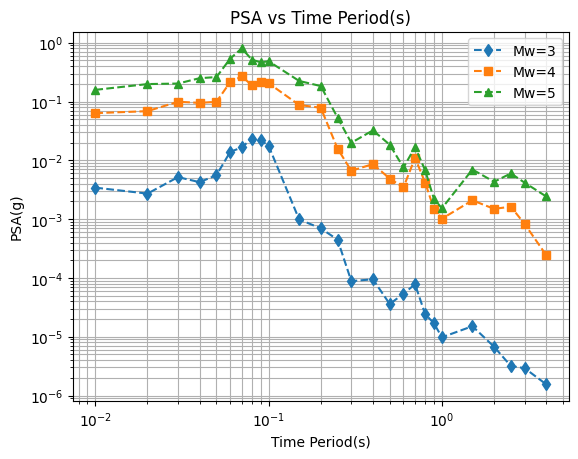

In [ ]:
plt.plot(PSA_tp, mean_array[0][5:], linestyle='--', marker = 'd', label="Mw=3")
plt.plot(PSA_tp, mean_array[1][5:], linestyle='--', marker = 's', label="Mw=4")
plt.plot(PSA_tp, mean_array[2][5:], linestyle='--', marker = '^', label="Mw=5")

plt.grid(True, which="both")
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="upper right")
plt.title("PSA vs Time Period(s)")
plt.xlabel("Time Period(s)")
plt.ylabel("PSA(g)")

In [ ]:
X_plot = pd.DataFrame(columns = ['Mw', 'logRjb', 'Vs30'])

X_plot.loc[0] = [4, math.log10(10), 760]
X_plot.loc[1] = [4, math.log10(50), 760]
X_plot.loc[2] = [4, math.log10(100), 760]
X_plot.loc[3] = [4, math.log10(150), 760]

X_plot = scaler_cond.transform(X_plot.to_numpy())

# predicted_outputs = predict(X_plot, generator, device)
# predicted_outputs = scaler.inverse_transform(predicted_outputs)
# predicted_outputs = np.power(10, predicted_outputs)

In [ ]:
# plt.plot(PSA_tp, predicted_outputs[0][5:], linestyle='--', marker = 'd', label="Rjb=10km")
# plt.plot(PSA_tp, predicted_outputs[1][5:], linestyle='--', marker = 's', label="Rjb=50km")
# plt.plot(PSA_tp, predicted_outputs[2][5:], linestyle='--', marker = '^', label="Rjb=100km")

# plt.grid(True, which="both")
# plt.xscale('log')
# plt.yscale('log')

# plt.legend(loc="upper right")
# plt.title("PSA vs Time(s) for Single Predictions")
# plt.xlabel("Time Period(s)")
# plt.ylabel("PSA(g)")

In [ ]:
mean_output = []

for i in range(1000):
  output = predict(X_plot, generator, device)
  output = scaler.inverse_transform(output)

  mean_output.append(output)

mean_array = np.mean(mean_output, axis=0)
mean_array = np.power(10, mean_array)

Text(0, 0.5, 'PSA(g)')

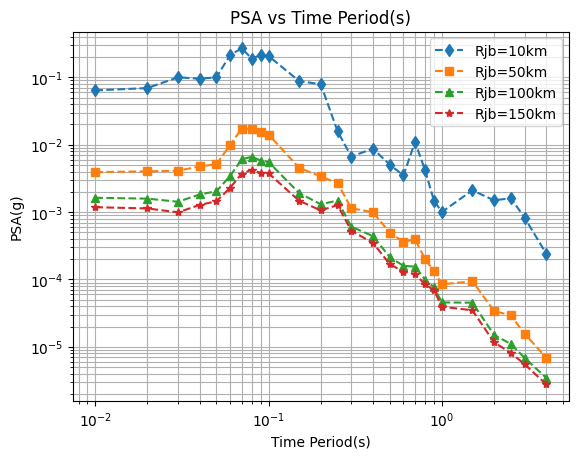

In [ ]:
plt.plot(PSA_tp, mean_array[0][5:], linestyle='--', marker = 'd', label="Rjb=10km")
plt.plot(PSA_tp, mean_array[1][5:], linestyle='--', marker = 's', label="Rjb=50km")
plt.plot(PSA_tp, mean_array[2][5:], linestyle='--', marker = '^', label="Rjb=100km")
plt.plot(PSA_tp, mean_array[3][5:], linestyle='--', marker = '*', label="Rjb=150km")

plt.grid(True, which="both")
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="upper right")
plt.title("PSA vs Time Period(s)")
plt.xlabel("Time Period(s)")
plt.ylabel("PSA(g)")

In [ ]:
dict_ = {0:'d', 1:'s', 2:'^', 3:'*', 4:'o', 5:'+'}

In [ ]:
X_plot = pd.DataFrame(columns = ['Mw', 'logRjb', 'Vs30'])

X_plot.loc[0] = [4, math.log10(100), 540]
X_plot.loc[1] = [4, math.log10(100), 760]
X_plot.loc[2] = [4, math.log10(100), 1080]

X_plot = scaler_cond.transform(X_plot.to_numpy())

# predicted_outputs = predict(X_plot, generator, device)
# predicted_outputs = scaler.inverse_transform(predicted_outputs)
# predicted_outputs = np.power(10, predicted_outputs)

In [ ]:
mean_output = []

for i in range(1000):
  output = predict(X_plot, generator, device)
  output = scaler.inverse_transform(output)

  mean_output.append(output)

mean_array = np.mean(mean_output, axis=0)
mean_array = np.power(10, mean_array)

Text(0, 0.5, 'PSA(g)')

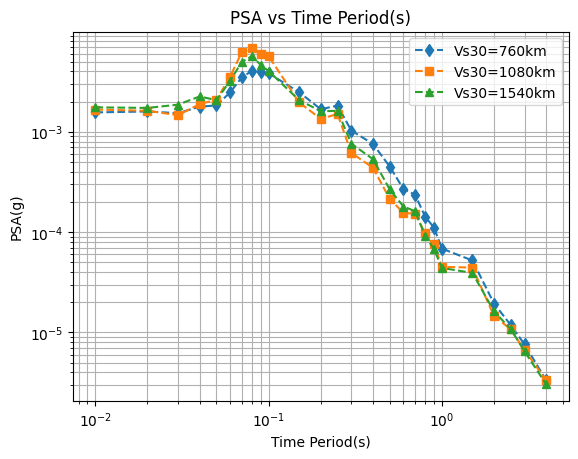

In [ ]:
plt.plot(PSA_tp, mean_array[0][5:], linestyle='--', marker = 'd', label="Vs30=760km")
plt.plot(PSA_tp, mean_array[1][5:], linestyle='--', marker = 's', label="Vs30=1080km")
plt.plot(PSA_tp, mean_array[2][5:], linestyle='--', marker = '^', label="Vs30=1540km")

plt.grid(True, which="both")
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="upper right")
plt.title("PSA vs Time Period(s)")
plt.xlabel("Time Period(s)")
plt.ylabel("PSA(g)")

In [ ]:
temp_Rjb = []

for i in range(200):
  temp_Rjb.append((i+1)*5)

X_plot = pd.DataFrame(columns = ['Mw', 'logRjb', 'Vs30'])

for i in range(200):
  X_plot.loc[i] = [5, np.log10((i+1)*5), 2000]

X_plot = scaler_cond.transform(X_plot)

In [ ]:
mean_predictions = []

for i in range(1000):
  predictions = predict(X_plot, generator, device)
  predictions = scaler.inverse_transform(predictions)

  mean_predictions.append(predictions)

mean_array = np.mean(mean_predictions, axis=0)
mean_array = np.power(10, mean_array)

In [ ]:
multi_predictions = []
pred_value = []

for i in range(200):
  multi_predictions.append([])
  pred_value.append([])

for i in range(1000):
  predictions = predict(X_plot, generator, device)
  predictions = scaler.inverse_transform(predictions)

  mean_predictions.append(predictions)
  for j in range(200):
    multi_predictions[j].append(predictions[j])

for i in range(200):
  pred_value[i] = np.array(multi_predictions[i]).mean(axis=0)
  # pred_value[i] = np.power(10, pred_value[i])

In [ ]:
y_plot = predict(X_plot, generator, device)
y_plot = scaler.inverse_transform(y_plot)

y_plot_new = []

for i in range(200):
  y_plot_new.append(y_plot[i][2:])

Text(0.5, 0, 'Rjb(km)')

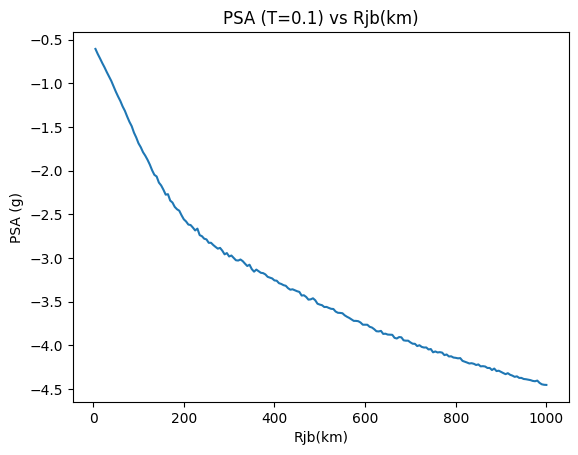

In [ ]:
temp_plot = []

for i in range(200):
  temp_plot.append(pred_value[i][9])

plt.plot(temp_Rjb, temp_plot)

plt.title("PSA (T=0.1) vs Rjb(km)")
plt.ylabel("PSA (g)")
plt.xlabel("Rjb(km)")

In [ ]:
X_plot = pd.DataFrame(columns = ['Mw', 'logRjb', 'Vs30'])

temp_Mw = []

for i in range(20,60):
  temp_Mw.append((i+1)*0.1)

j=0
for i in range(20,60):
  X_plot.loc[j] = [(i+1)*0.1, np.log10(100), 760]
  j+=1

X_plot = scaler_cond.transform(X_plot)

In [ ]:
mean_predictions = []

for i in range(1000):
  predictions = predict(X_plot, generator, device)
  predictions = scaler.inverse_transform(predictions)

  mean_predictions.append(predictions)

mean_array = np.mean(mean_predictions, axis=0)
mean_array = np.power(10, mean_array)

In [ ]:
multi_predictions = []
pred_value = []

for i in range(40):
  multi_predictions.append([])
  pred_value.append([])

for i in range(40):
  predictions = predict(X_plot, generator, device)
  predictions = scaler.inverse_transform(predictions)

  mean_predictions.append(predictions)
  for j in range(40):
    multi_predictions[j].append(predictions[j])

for i in range(40):
  pred_value[i] = np.array(multi_predictions[i]).mean(axis=0)
  # pred_value[i] = np.power(10, pred_value[i])

In [ ]:
y_plot = predict(X_plot, generator, device)
y_plot = scaler.inverse_transform(y_plot)

y_plot_new = []

for i in range(40):
  y_plot_new.append(y_plot[i][2:])

Text(0.5, 0, 'Mw')

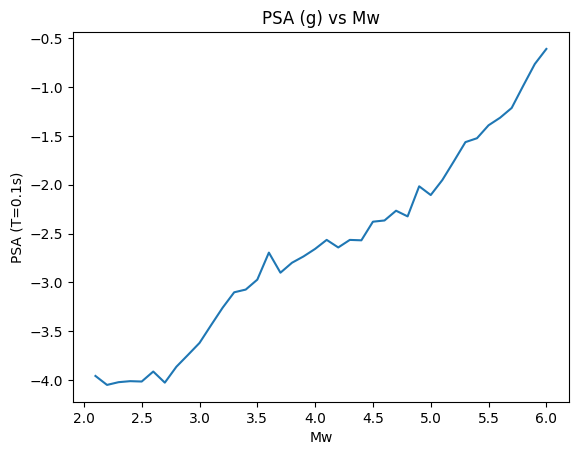

In [ ]:
temp_plot = []

for i in range(40):
  temp_plot.append(pred_value[i][9])

plt.plot(temp_Mw, temp_plot)

plt.title("PSA (g) vs Mw")
plt.ylabel("PSA (T=0.1s)")
plt.xlabel("Mw")

In [ ]:
his = pd.read_csv('/content/drive/MyDrive/Seismic/results.csv')

In [ ]:
his.columns = ['i', 'best_r2', 'curr_r2', 'd_loss', 'g_loss']

In [ ]:
his

,i,best_r2,curr_r2,d_loss,g_loss
0,1,0.744885,0.646412,0.306909,19.137222
1,2,0.744885,0.680973,0.351307,26.831217
2,3,0.744885,0.672986,0.431751,24.739433
3,4,0.744885,0.706173,0.406007,20.892000
4,5,0.744885,0.717765,0.384715,29.322039
...,...,...,...,...,...
65694,49995,0.793125,0.730849,0.335244,20.339342
65695,49996,0.793125,0.737842,0.446070,25.695454
65696,49997,0.793125,0.746355,0.297829,26.429731
65697,49998,0.793125,0.682301,0.280285,29.876740


In [ ]:
r2_his = his['curr_r2']
d_loss_his = his['d_loss']
g_loss_his = his['g_loss']

Text(0.5, 1.0, 'Generator Loss vs Number of Epochs')

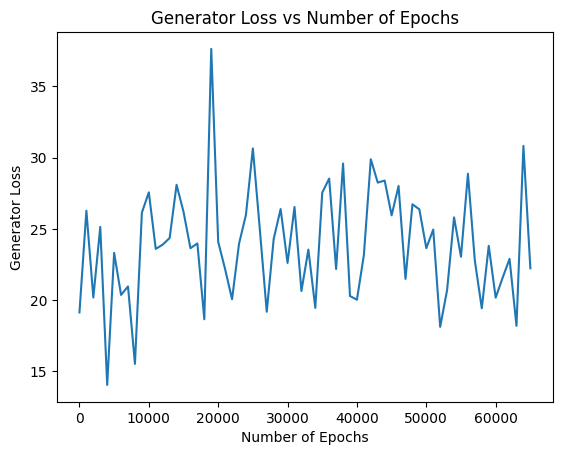

In [ ]:
g_loss_mini = []
g_loss_idx = []

for i in range(len(g_loss_his)):
  if(i%1000==0):
    g_loss_mini.append(g_loss_his.iloc[i])
    g_loss_idx.append(i)

plt.plot(g_loss_idx, g_loss_mini)
plt.xlabel('Number of Epochs')
plt.ylabel('Generator Loss')
plt.title('Generator Loss vs Number of Epochs')

Text(0.5, 1.0, 'Discriminator Loss vs Number of Epochs')

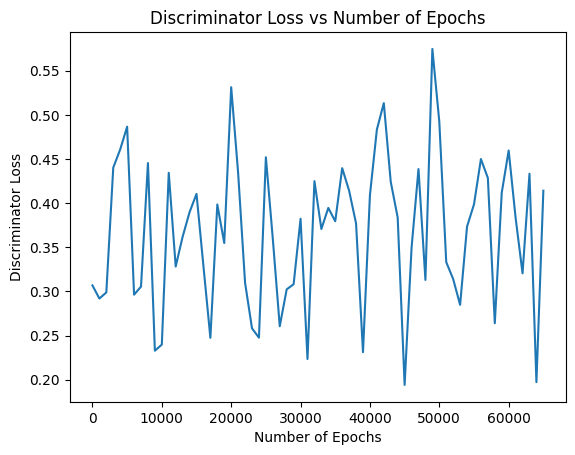

In [ ]:
d_loss_mini = []
d_loss_idx = []

for i in range(len(d_loss_his)):
  if(i%1000==0):
    d_loss_mini.append(d_loss_his.iloc[i])
    d_loss_idx.append(i)

plt.plot(d_loss_idx, d_loss_mini)
plt.xlabel('Number of Epochs')
plt.ylabel('Discriminator Loss')
plt.title('Discriminator Loss vs Number of Epochs')